In [11]:
!pip install palmerpenguins

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
# Carregando o dataset 'pinguins'
from palmerpenguins import load_penguins

In [13]:
df = load_penguins()

# Removendo linhas com valores ausentes
df_clean = df.dropna()

df_clean

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [14]:
# Exibindo estatísticas descritivas
df_clean.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,333.000000,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057,2008.042042
std,5.468668,1.969235,14.015765,805.215802,0.812944
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.500000,15.600000,190.000000,3550.000000,2007.000000
50%,44.500000,17.300000,197.000000,4050.000000,2008.000000
75%,48.600000,18.700000,213.000000,4775.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


In [15]:
# Exibindo a estrutura do dataset
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
 7   year               333 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 23.4+ KB


In [16]:
# Matriz de correlação
df_corr = df_clean[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']].corr()
print(df_corr)

                   bill_length_mm  bill_depth_mm  flipper_length_mm  \
bill_length_mm           1.000000      -0.228626           0.653096   
bill_depth_mm           -0.228626       1.000000          -0.577792   
flipper_length_mm        0.653096      -0.577792           1.000000   
body_mass_g              0.589451      -0.472016           0.872979   

                   body_mass_g  
bill_length_mm        0.589451  
bill_depth_mm        -0.472016  
flipper_length_mm     0.872979  
body_mass_g           1.000000  


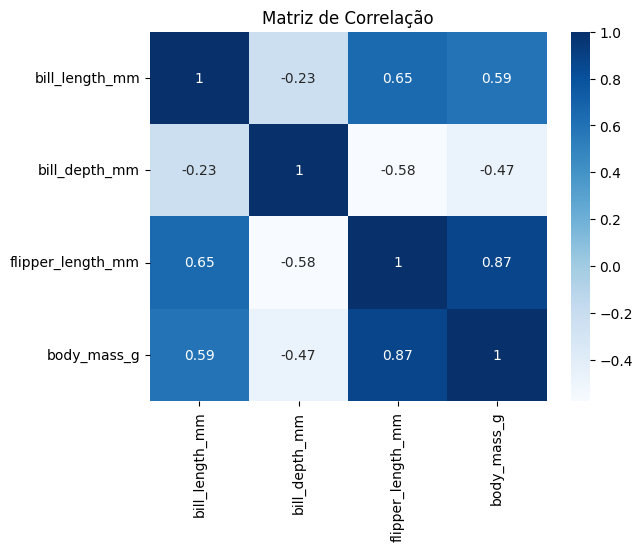

In [17]:
# Gráfico de correlação
sns.heatmap(df_corr, annot=True, cmap='Blues')
plt.title("Matriz de Correlação")
plt.show()

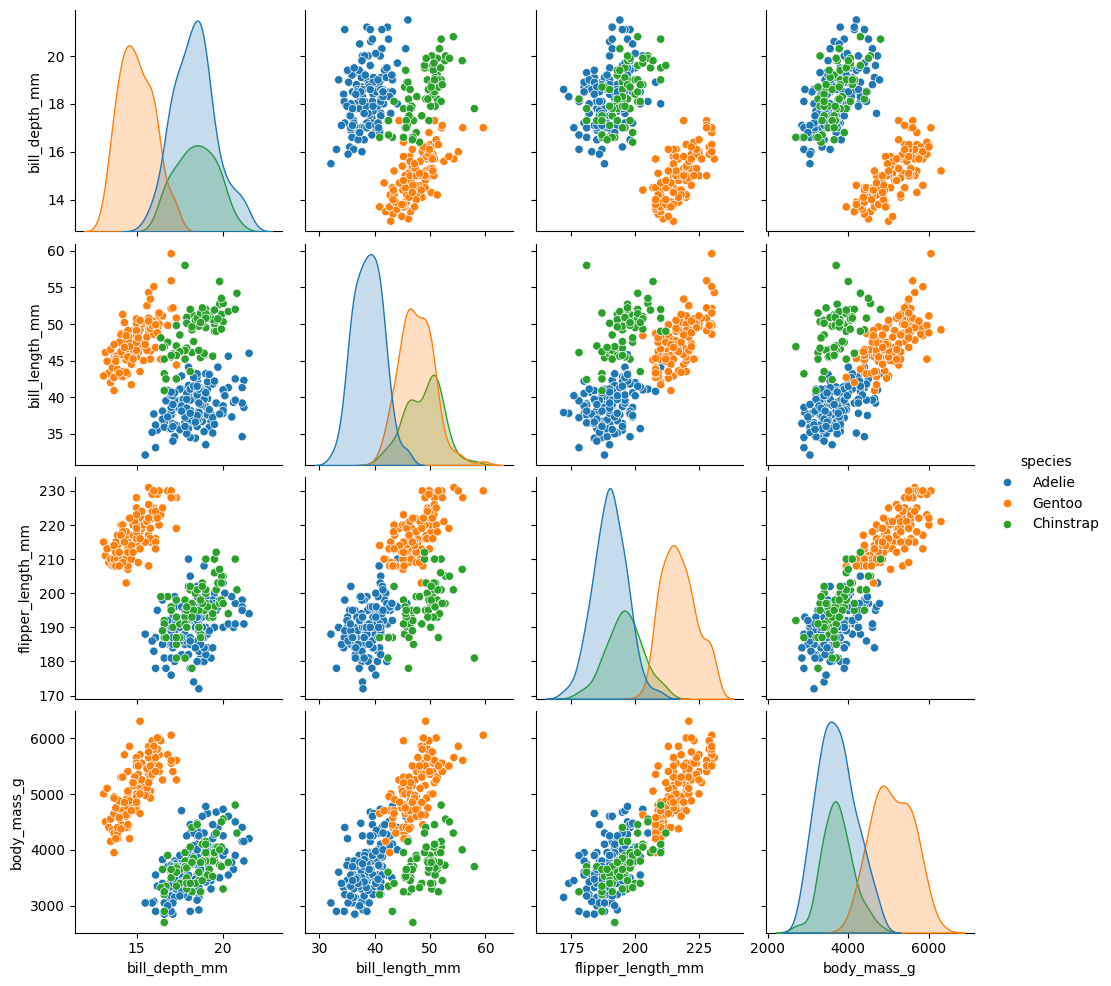

In [18]:
# Scatter plot entre profundidade do bico e variáveis explicativas
sns.pairplot(df_clean, vars=['bill_depth_mm', 'bill_length_mm', 'flipper_length_mm', 'body_mass_g'], hue='species')
plt.show()

In [19]:
# Modelos de regressão linear
formula_1 = "bill_depth_mm ~ bill_length_mm + flipper_length_mm + body_mass_g"
modelo_1 = ols(formula_1, data=df_clean).fit()
print(modelo_1.summary())

                            OLS Regression Results                            
Dep. Variable:          bill_depth_mm   R-squared:                       0.376
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                     65.96
Date:                Wed, 02 Apr 2025   Prob (F-statistic):           2.03e-33
Time:                        01:16:53   Log-Likelihood:                -619.25
No. Observations:                 333   AIC:                             1247.
Df Residuals:                     329   BIC:                             1262.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            35.8005      1.78

In [20]:
# Modelo sem body_mass_g
formula_2 = "bill_depth_mm ~ bill_length_mm + flipper_length_mm"
modelo_2 = ols(formula_2, data=df_clean).fit()
print(modelo_2.summary())

                            OLS Regression Results                            
Dep. Variable:          bill_depth_mm   R-squared:                       0.372
Model:                            OLS   Adj. R-squared:                  0.369
Method:                 Least Squares   F-statistic:                     97.91
Date:                Wed, 02 Apr 2025   Prob (F-statistic):           4.13e-34
Time:                        01:16:53   Log-Likelihood:                -620.09
No. Observations:                 333   AIC:                             1246.
Df Residuals:                     330   BIC:                             1258.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            34.1536      1.24

In [21]:
# Modelo sem flipper_length_mm
formula_3 = "bill_depth_mm ~ bill_length_mm + body_mass_g"
modelo_3 = ols(formula_3, data=df_clean).fit()
print(modelo_3.summary())

                            OLS Regression Results                            
Dep. Variable:          bill_depth_mm   R-squared:                       0.227
Model:                            OLS   Adj. R-squared:                  0.222
Method:                 Least Squares   F-statistic:                     48.34
Date:                Wed, 02 Apr 2025   Prob (F-statistic):           3.89e-19
Time:                        01:16:53   Log-Likelihood:                -654.88
No. Observations:                 333   AIC:                             1316.
Df Residuals:                     330   BIC:                             1327.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         21.2781      0.775     27.

In [22]:
# Comparando AIC e BIC
print(f"AIC Modelo 2: {modelo_2.aic}")
print(f"AIC Modelo 3: {modelo_3.aic}")
print(f"BIC Modelo 2: {modelo_2.bic}")
print(f"BIC Modelo 3: {modelo_3.bic}")

AIC Modelo 2: 1246.1863365308845
AIC Modelo 3: 1315.7691740857554
BIC Modelo 2: 1257.6107640008258
BIC Modelo 3: 1327.1936015556967


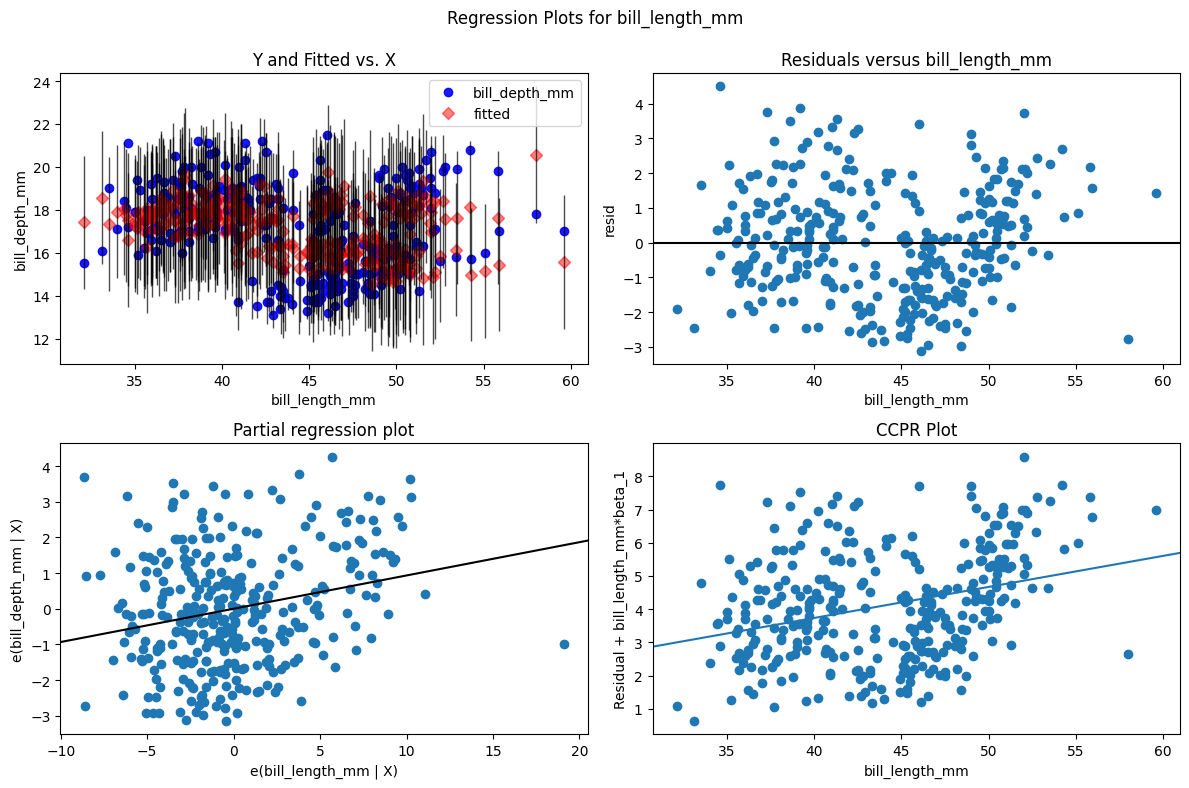

In [23]:
# Diagnóstico do modelo 2
fig = plt.figure(figsize=(12, 8))
sm.graphics.plot_regress_exog(modelo_2, 'bill_length_mm', fig=fig)
plt.show()

In [24]:
# Previsões com intervalo de confiança
novas_preditoras = pd.DataFrame({'bill_length_mm': [45, 50], 'flipper_length_mm': [190, 210]})
previsoes = modelo_2.get_prediction(novas_preditoras).summary_frame(alpha=0.05)
print(previsoes)

        mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0  18.410225  0.134475      18.145688      18.674762     15.320730   
1  16.777602  0.127750      16.526295      17.028908     13.689211   

   obs_ci_upper  
0     21.499720  
1     19.865992  
